In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import traceback
import re
from pandas import Series
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import warnings
import os
import collections
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import string
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**EXPLORATORY DATA ANALYSIS**

In [2]:
login_time= pd.read_json('logins.json')

In [3]:
login_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
login_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
login_time.describe()

<ipython-input-5-32220244b547>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  login_time.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
login_time.drop_duplicates(inplace=True)

In [7]:
login_time.describe()

<ipython-input-7-32220244b547>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  login_time.describe()


,login_time
count,92265
unique,92265
top,1970-03-19 13:50:20
freq,1
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [8]:
login_time['count'] = 1
login_time = login_time.set_index('login_time')

In [9]:
login_time.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [10]:
login_time = login_time.resample('15T').sum()
login_time.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


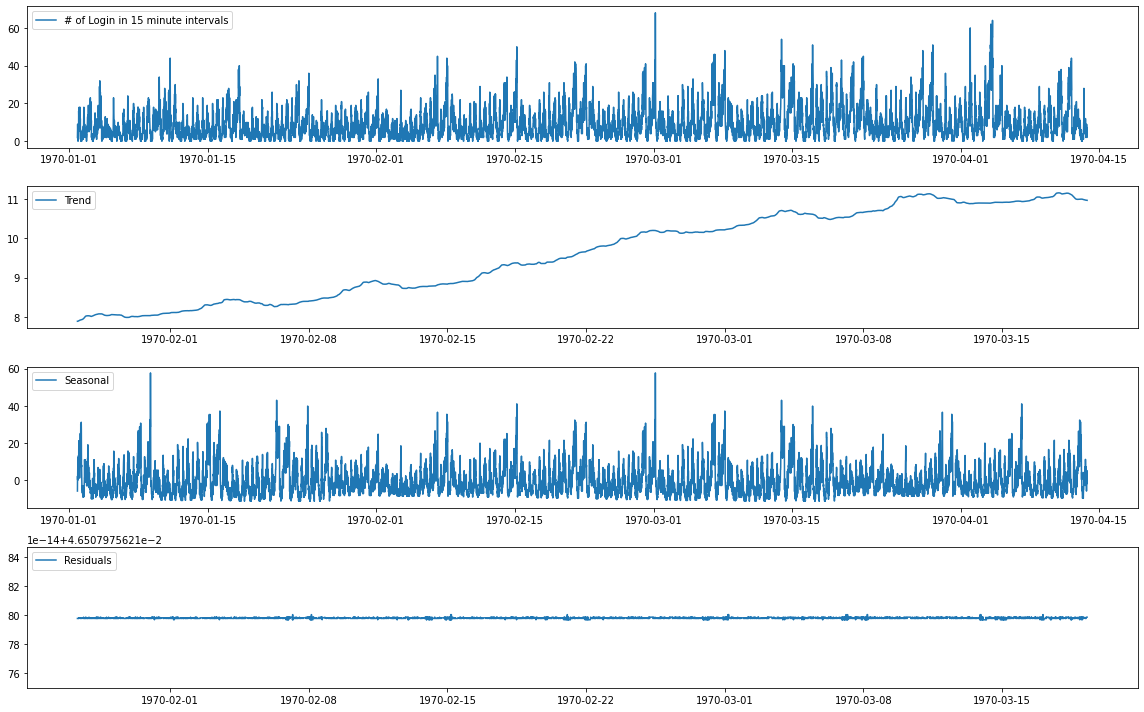

In [11]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

y = login_time['count']

decomposition= seasonal_decompose(y, model='additive',period=4894) #I chose 4894 because there were 9788 observations

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 10))
plt.subplot(411)
plt.plot(y, label = '# of Login in 15 minute intervals')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'upper left')
plt.tight_layout();



In [12]:
login_time['month'] = login_time.index.month
login_time['week'] = login_time.index.week
login_time['day'] = login_time.index.day
login_time['hour'] = login_time.index.hour
login_time['dayofweek'] = login_time.index.dayofweek

<ipython-input-12-d1085d6e4529>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  login_time['week'] = login_time.index.week


In [13]:
login_time.tail()

,count,month,week,day,hour,dayofweek
login_time,,,,,,
1970-04-13 17:45:00,5,4,16,13,17,0
1970-04-13 18:00:00,5,4,16,13,18,0
1970-04-13 18:15:00,2,4,16,13,18,0
1970-04-13 18:30:00,7,4,16,13,18,0
1970-04-13 18:45:00,6,4,16,13,18,0


In [14]:
login_time.describe()

,count,month,week,day,hour,dayofweek
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.426338,2.259093,8.325296,14.569268,11.496935,3.035554
std,8.172091,1.017219,4.215948,8.683342,6.922294,2.012722
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000,7.000000,5.000000,1.000000
50%,7.000000,2.000000,8.000000,14.000000,11.000000,3.000000
75%,13.000000,3.000000,12.000000,22.000000,17.000000,5.000000
max,68.000000,4.000000,16.000000,31.000000,23.000000,6.000000


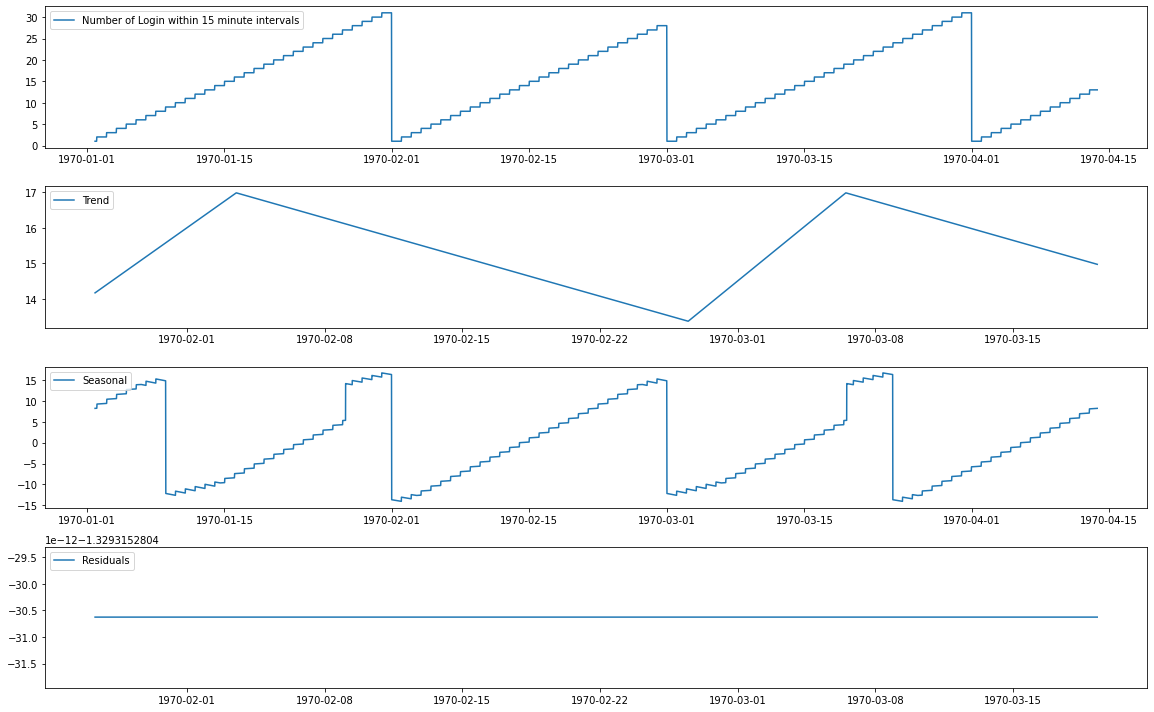

In [15]:
y1 = login_time['day']

decomposition= seasonal_decompose(y1, model='additive',period=4894) #I chose 4894 because there were 9788 observations

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 10))
plt.subplot(411)
plt.plot(y1, label = 'Number of Login within 15 minute intervals')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'upper left')
plt.tight_layout();

<AxesSubplot:xlabel='login_time'>

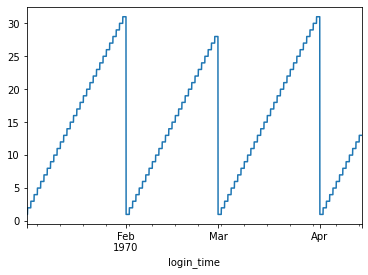

In [16]:
login_time['day'].plot()

<AxesSubplot:xlabel='login_time'>

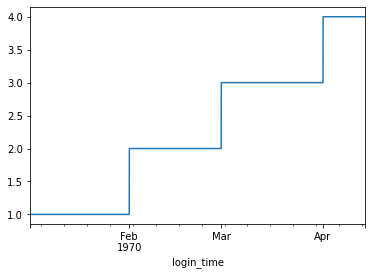

In [17]:
login_time['month'].plot()

<AxesSubplot:xlabel='login_time'>

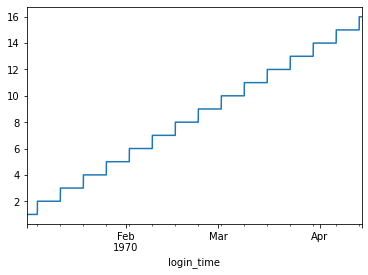

In [18]:
login_time['week'].plot()

Text(0.5, 1.0, 'Login counts per month')

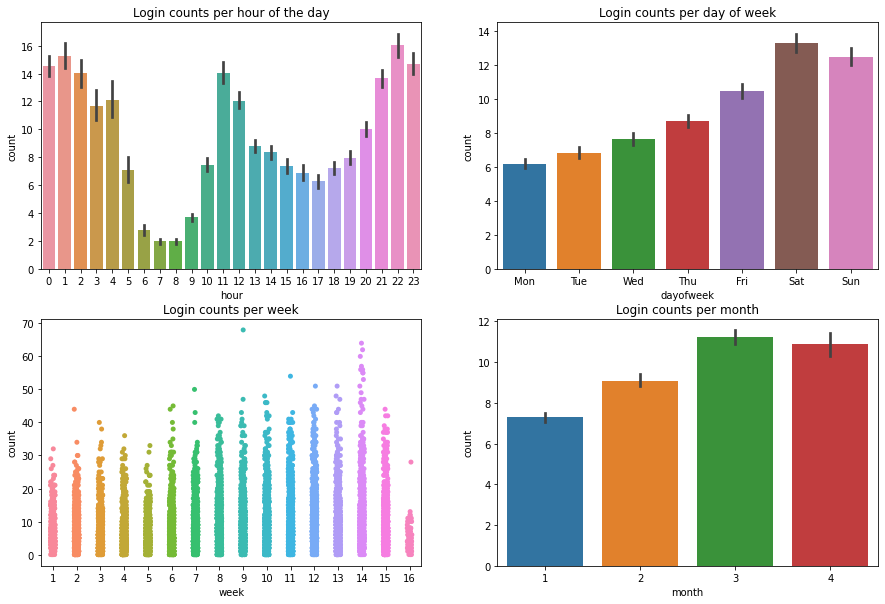

In [19]:
plt.figure(figsize=(15,10))
# daily cycles
ax1 = plt.subplot(2,2,1)
sns.barplot(x='hour',y='count', data=login_time)
ax1.set_title('Login counts per hour of the day')

ax2 = plt.subplot(2,2,2)
cat=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.barplot(x='dayofweek',y='count', data=login_time).set_xticklabels(cat)
ax2.set_title('Login counts per day of week')

ax3= plt.subplot(2,2,3)
sns.stripplot(x='week',y='count',data=login_time)
ax3.set_title('Login counts per week')

ax4= plt.subplot(2,2,4)
sns.barplot(x='month',y='count',data=login_time)
ax4.set_title('Login counts per month')



It can be inferred from the data analysis that there is a steady increment and drop in login times. There are fewer login times in the mornings with a spike at the 11th hour, a slight drop, with another spike at the 22nd hour. It appears that most activity is happening at night. It can also be seen that login time has a steady increase throughout the week, the highest being on Saturday. Additionally, there are only four months of data, as displayed in the bottom two strip and bar plots (only 16 weeks and 4 months plotted). Perhaps this is due to incomplete data or seasonality usage. 

**EXPERIMENT AND METRIC DESIGN**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs

**!Key Measure of Success:**! To be able to identify what city drivers are from, in that manner, correct reimbursement on toll costs can be identified and paid. 

**DATA CLEANING ON ULTIMATE DATA CHALLENGE DATASET**

In [20]:
ultimate_data= pd.read_json('ultimate_data_challenge.json')

In [21]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
ultimate_data['signup_date']=pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['avg_rating_of_driver']=ultimate_data['avg_rating_of_driver'].fillna(ultimate_data['avg_rating_of_driver'].mean())
ultimate_data['last_trip_date']=pd.to_datetime(ultimate_data['last_trip_date'])
ultimate_data['phone']= ultimate_data['phone'].fillna('Unknown')
ultimate_data['ultimate_black_user'] = np.where(ultimate_data['ultimate_black_user'] == True, 1 , 0)
ultimate_data['avg_rating_by_driver']=ultimate_data['avg_rating_by_driver'].fillna(ultimate_data['avg_rating_by_driver'].mean())

In [24]:
ultimate_data['phone'].value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

In [25]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


In [26]:
ultimate_data.drop_duplicates(inplace=True)

In [27]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  int32         
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int32(1), in

In [28]:
ultimate_data['phone_type'] = ultimate_data['phone']
ultimate_data = pd.get_dummies(ultimate_data, columns=['phone'])

ultimate_data.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50,100,80,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13


In [29]:
from datetime import timedelta

period = (ultimate_data['signup_date']+timedelta(days=30))
ultimate_data['active_inactive'] = np.where(ultimate_data['last_trip_date']>=period,1,0)
ultimate_data.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50,100,80,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13


In [30]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   surge_pct               49992 non-null  float64       
 7   ultimate_black_user     49992 non-null  int32         
 8   weekday_pct             49992 non-null  float64       
 9   avg_dist                49992 non-null  float64       
 10  avg_rating_by_driver    49992 non-null  float64       
 11  phone_type              49992 non-null  object        
 12  phone_Android           49992 non-null  uint8 

In [31]:
ultimate_data = pd.get_dummies(ultimate_data, columns=['city'])

ultimate_data.head().T

,0,1,2,3,4
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50,100,80,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9


In [32]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49992 non-null  int64         
 1   signup_date             49992 non-null  datetime64[ns]
 2   avg_rating_of_driver    49992 non-null  float64       
 3   avg_surge               49992 non-null  float64       
 4   last_trip_date          49992 non-null  datetime64[ns]
 5   surge_pct               49992 non-null  float64       
 6   ultimate_black_user     49992 non-null  int32         
 7   weekday_pct             49992 non-null  float64       
 8   avg_dist                49992 non-null  float64       
 9   avg_rating_by_driver    49992 non-null  float64       
 10  phone_type              49992 non-null  object        
 11  phone_Android           49992 non-null  uint8         
 12  phone_Unknown           49992 non-null  uint8 

In [33]:
ultimate_data.nunique()

trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        38
avg_surge                  115
last_trip_date             182
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        28
phone_type                   3
phone_Android                2
phone_Unknown                2
phone_iPhone                 2
active_inactive              2
city_Astapor                 2
city_King's Landing          2
city_Winterfell              2
dtype: int64

In [34]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'avg_rating_by_driver', data=ultimate_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Avg Rate by Driver')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

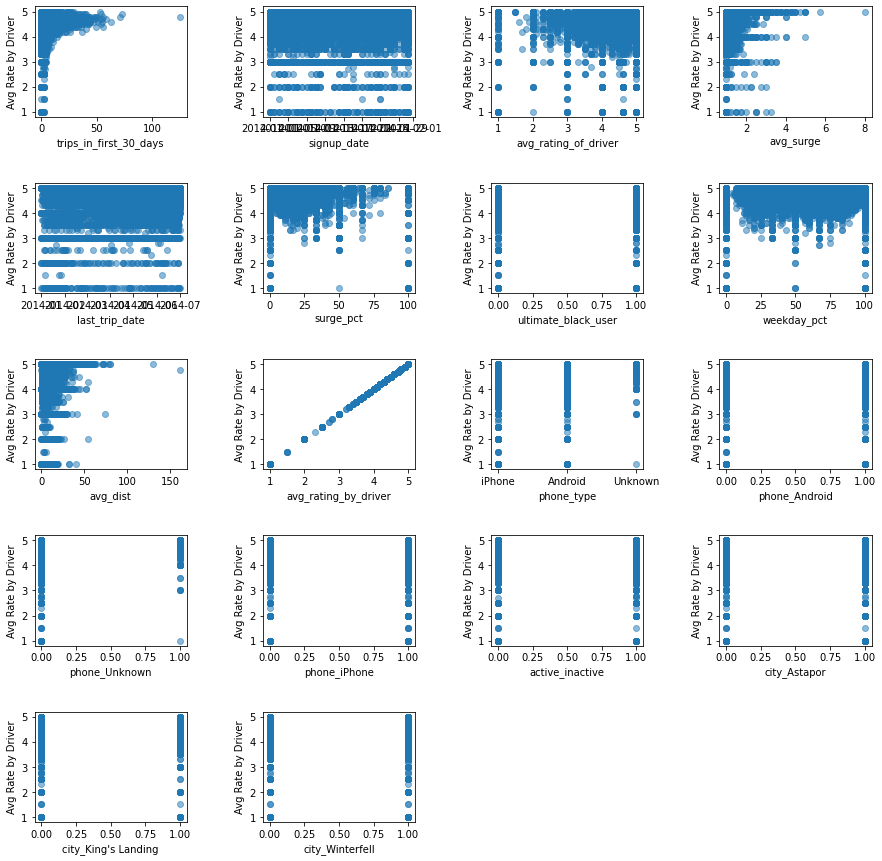

In [35]:
features = ultimate_data.columns
scatterplots(features, ncol=4, figsize=(15, 15))

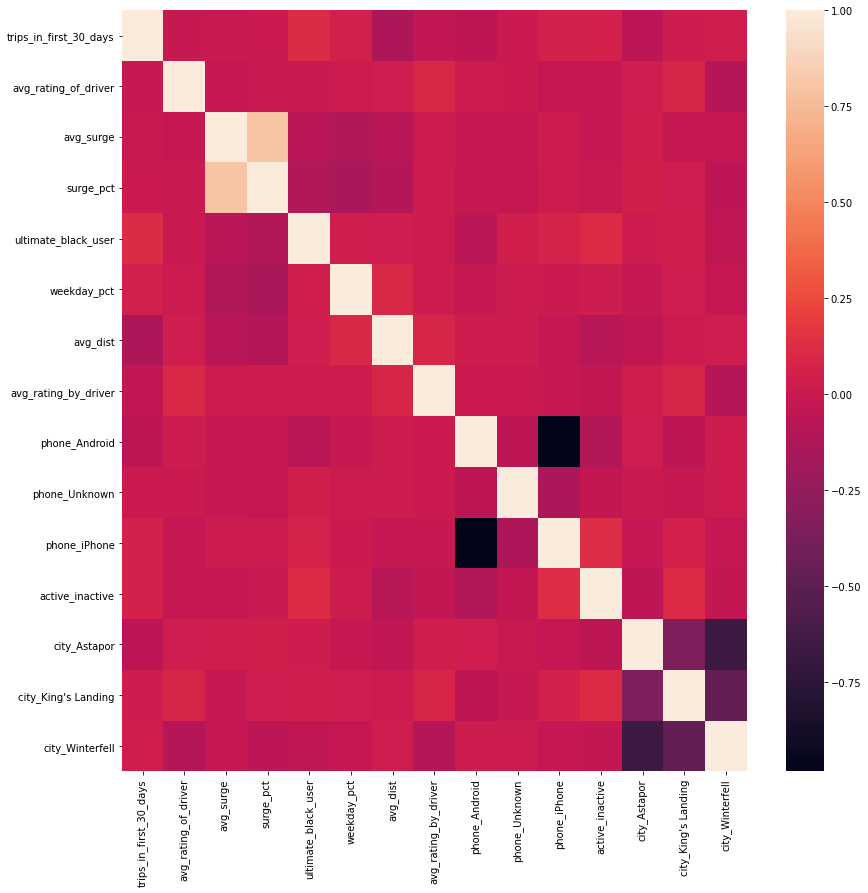

In [36]:
plt.subplots(figsize=(14,14))
sns.heatmap(ultimate_data.corr());

In [37]:
ultimate_data['active_days'] = ultimate_data['last_trip_date'] - ultimate_data['signup_date']
ultimate_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_type,phone_Android,phone_Unknown,phone_iPhone,active_inactive,city_Astapor,city_King's Landing,city_Winterfell,active_days
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,iPhone,0,0,1,1,0,1,0,143 days
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,Android,1,0,0,1,1,0,0,96 days
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,iPhone,0,0,1,0,1,0,0,1 days
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,iPhone,0,0,1,1,0,1,0,170 days
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,Android,1,0,0,1,0,0,1,47 days


In [38]:
ultimate_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_type,phone_Android,phone_Unknown,phone_iPhone,active_inactive,city_Astapor,city_King's Landing,city_Winterfell,active_days
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,iPhone,0,0,1,1,0,1,0,143 days
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,Android,1,0,0,1,1,0,0,96 days
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,iPhone,0,0,1,0,1,0,0,1 days
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,iPhone,0,0,1,1,0,1,0,170 days
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,Android,1,0,0,1,0,0,1,47 days


In [39]:
ultimate_data['signup_month'] = ultimate_data['signup_date'].dt.month
ultimate_data['signup_day'] = ultimate_data['signup_date'].dt.day
ultimate_data['signup_week'] = ultimate_data['signup_date'].dt.week
ultimate_data['signup_weekday'] = ultimate_data['signup_date'].dt.dayofweek
ultimate_data['signup_year'] = ultimate_data['signup_date'].dt.year
ultimate_data.head()

<ipython-input-39-7bd961721851>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ultimate_data['signup_week'] = ultimate_data['signup_date'].dt.week


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,active_inactive,city_Astapor,city_King's Landing,city_Winterfell,active_days,signup_month,signup_day,signup_week,signup_weekday,signup_year
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,...,1,0,1,0,143 days,1,25,4,5,2014
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,...,1,1,0,0,96 days,1,29,5,2,2014
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,...,0,1,0,0,1 days,1,6,2,0,2014
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,...,1,0,1,0,170 days,1,10,2,4,2014
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,...,1,0,0,1,47 days,1,27,5,0,2014


In [40]:
ultimate_data['last_trip_month'] = ultimate_data['last_trip_date'].dt.month
ultimate_data['last_trip_day'] = ultimate_data['last_trip_date'].dt.day
ultimate_data['last_trip_week'] = ultimate_data['last_trip_date'].dt.week
ultimate_data['last_trip_weekday'] = ultimate_data['last_trip_date'].dt.dayofweek
ultimate_data['last_trip_year'] = ultimate_data['last_trip_date'].dt.year
ultimate_data.head()

<ipython-input-40-bacd78fbe916>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ultimate_data['last_trip_week'] = ultimate_data['last_trip_date'].dt.week


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,signup_month,signup_day,signup_week,signup_weekday,signup_year,last_trip_month,last_trip_day,last_trip_week,last_trip_weekday,last_trip_year
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,...,1,25,4,5,2014,6,17,25,1,2014
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,...,1,29,5,2,2014,5,5,19,0,2014
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,...,1,6,2,0,2014,1,7,2,1,2014
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,...,1,10,2,4,2014,6,29,26,6,2014
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,...,1,27,5,0,2014,3,15,11,5,2014


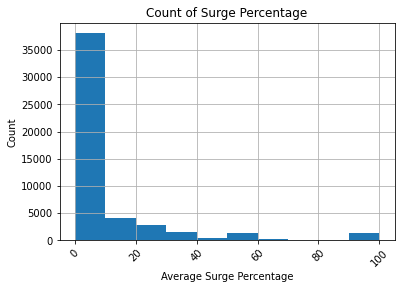

In [41]:
ultimate_data.surge_pct.hist(bins=10)
plt.xticks(rotation=45)
plt.title('Count of Surge Percentage')
plt.xlabel('Average Surge Percentage')
plt.ylabel('Count');

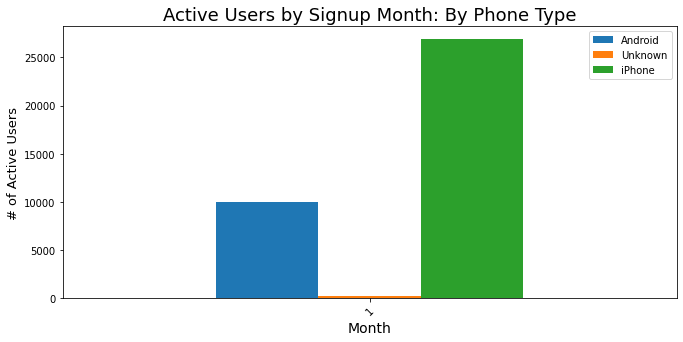

In [42]:
users_by_signup_month=ultimate_data[ultimate_data['active_inactive']==1].groupby(['signup_month'])['phone_type'].value_counts().unstack().fillna(0)
users_by_signup_month.plot.bar(figsize=(11,5))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='medium')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('# of Active Users', fontsize=13)
plt.title('Active Users by Signup Month: By Phone Type', fontsize=18, color='black')
plt.show()



It appears all signups happened in January. Perhaps we only have data for a month.

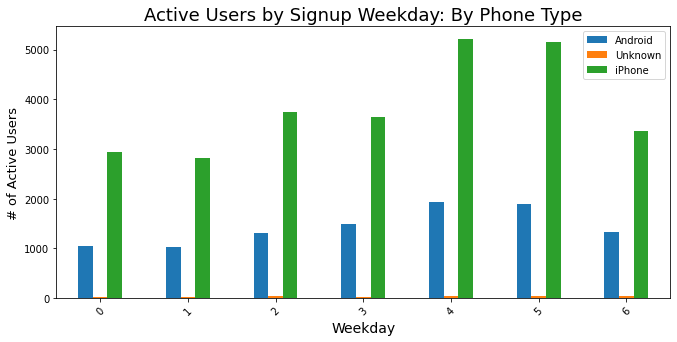

In [43]:
users_by_signup_weekday=ultimate_data[ultimate_data['active_inactive']==1].groupby(['signup_weekday'])['phone_type'].value_counts().unstack().fillna(0)
users_by_signup_weekday.plot.bar(figsize=(11,5))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='medium')
plt.xlabel('Weekday', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('# of Active Users', fontsize=13)
plt.title('Active Users by Signup Weekday: By Phone Type', fontsize=18, color='black')
plt.show()

During the week, a spike in signups happened on Thursday and Friday. 

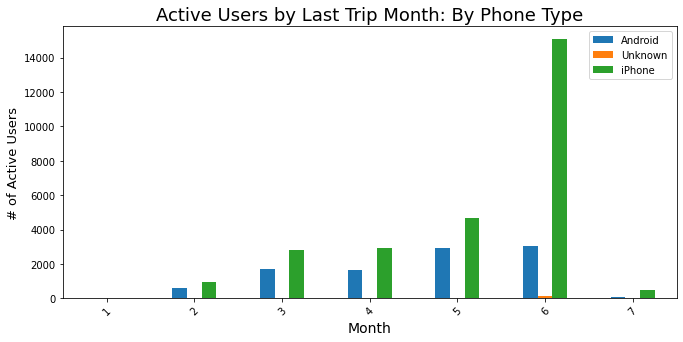

In [44]:
users_by_lasttrip_month=ultimate_data[ultimate_data['active_inactive']==1].groupby(['last_trip_month'])['phone_type'].value_counts().unstack().fillna(0)
users_by_lasttrip_month.plot.bar(figsize=(11,5))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='medium')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('# of Active Users', fontsize=13)
plt.title('Active Users by Last Trip Month: By Phone Type', fontsize=18, color='black')
plt.show()

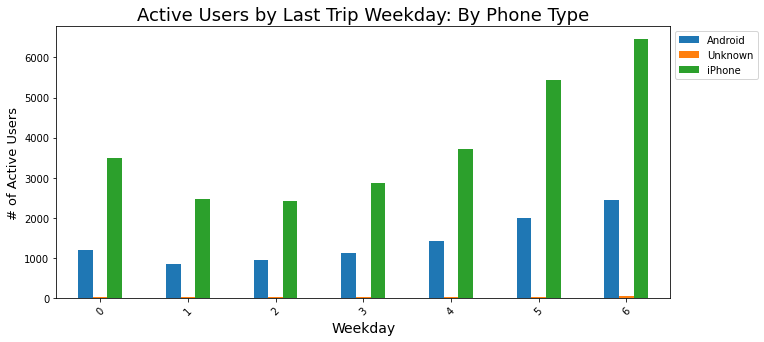

In [45]:
users_by_lasttrip_weekday=ultimate_data[ultimate_data['active_inactive']==1].groupby(['last_trip_weekday'])['phone_type'].value_counts().unstack().fillna(0)
users_by_lasttrip_weekday.plot.bar(figsize=(11,5))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='medium')
plt.xlabel('Weekday', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('# of Active Users', fontsize=13)
plt.title('Active Users by Last Trip Weekday: By Phone Type', fontsize=18, color='black')
plt.show()

In [46]:
drop_columns=['signup_date','last_trip_date','phone_type']

df = ultimate_data.drop(columns=drop_columns)
df['active_days']= df['active_days'].astype(str)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49992 non-null  int64  
 1   avg_rating_of_driver    49992 non-null  float64
 2   avg_surge               49992 non-null  float64
 3   surge_pct               49992 non-null  float64
 4   ultimate_black_user     49992 non-null  int32  
 5   weekday_pct             49992 non-null  float64
 6   avg_dist                49992 non-null  float64
 7   avg_rating_by_driver    49992 non-null  float64
 8   phone_Android           49992 non-null  uint8  
 9   phone_Unknown           49992 non-null  uint8  
 10  phone_iPhone            49992 non-null  uint8  
 11  active_inactive         49992 non-null  int32  
 12  city_Astapor            49992 non-null  uint8  
 13  city_King's Landing     49992 non-null  uint8  
 14  city_Winterfell         49992 non-null

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='active_inactive'), 
                                                    df.active_inactive, test_size=0.3, 
                                                    random_state=47)

In [51]:
# define a binning function

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [52]:
final_iv, IV = data_vars(X_train, y_train)

C:\Users\mayra\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(34994, 11)

,avg_surge,city_Astapor,city_King's Landing,last_trip_day,last_trip_month,last_trip_week,phone_Android,phone_iPhone,surge_pct,ultimate_black_user,weekday_pct
47342,1.0,1,0,26,4,17,1,0,0.0,1,74.3
46689,1.0,0,0,1,6,22,1,0,0.0,1,0.0
18488,1.0,0,0,16,6,25,0,1,0.0,0,40.0
30509,1.0,0,1,1,7,27,0,1,0.0,1,75.0
4176,1.0,0,0,23,6,26,0,1,0.0,0,0.0


In [54]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing last_trip_month with VIF of 2401.843135
Iteration # 2
Removing avg_surge with VIF of 50.027146
Iteration # 3
Removing phone_iPhone with VIF of 7.812192
Iteration # 4
Complete


In [55]:
X_train=final_df
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

8

Index(['city_Astapor', 'city_King's Landing', 'last_trip_day',
       'last_trip_week', 'phone_Android', 'surge_pct', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')

,city_Astapor,city_King's Landing,last_trip_day,last_trip_week,phone_Android,surge_pct,ultimate_black_user,weekday_pct
47342,1,0,26,17,1,0.0,1,74.3
46689,0,0,1,22,1,0.0,1,0.0
18488,0,0,16,25,0,0.0,0,40.0
30509,0,1,1,27,0,0.0,1,75.0
4176,0,0,23,26,0,0.0,0,0.0


In [56]:
X_test=X_test[X_train.columns]
X_test.head()

,city_Astapor,city_King's Landing,last_trip_day,last_trip_week,phone_Android,surge_pct,ultimate_black_user,weekday_pct
26306,1,0,2,9,0,50.0,0,0.0
31863,1,0,16,7,0,0.0,0,71.4
18661,0,0,8,23,0,0.0,1,45.0
23577,0,0,1,22,1,0.0,0,33.3
3298,0,0,1,22,0,0.0,1,0.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Features [0.00819898 0.00709357 0.05453113 0.87806022 0.00709989 0.01360478
 0.00590319 0.02550826]


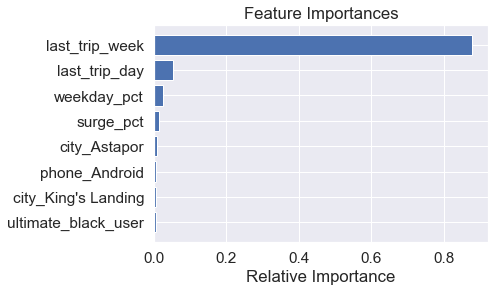

[[ 3486   407]
 [   80 11025]]


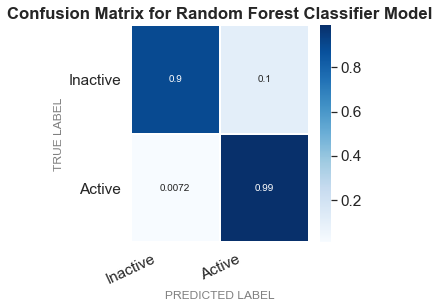

In [63]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth=50, class_weight=dict({1:49, 0:1}), verbose=2)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred1 = rf.predict(X_test)


print("Features",rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



roc1 = roc_auc_score(y_test, y_pred1)

roc1

#conf1 = confusion_matrix(y_test, y_pred1)
#conf1

print(confusion_matrix(y_test, y_pred1))
matrix = confusion_matrix(y_test, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)


# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Inactive', 'Active']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('PREDICTED LABEL', fontsize=12, color='grey')
plt.ylabel('TRUE LABEL', fontsize=12, color='grey')
plt.title('Confusion Matrix for Random Forest Classifier Model',fontweight='bold')
plt.show()

In [64]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      3893
           1       0.96      0.99      0.98     11105

    accuracy                           0.97     14998
   macro avg       0.97      0.94      0.96     14998
weighted avg       0.97      0.97      0.97     14998



In [65]:
roc1

0.9441247078392474

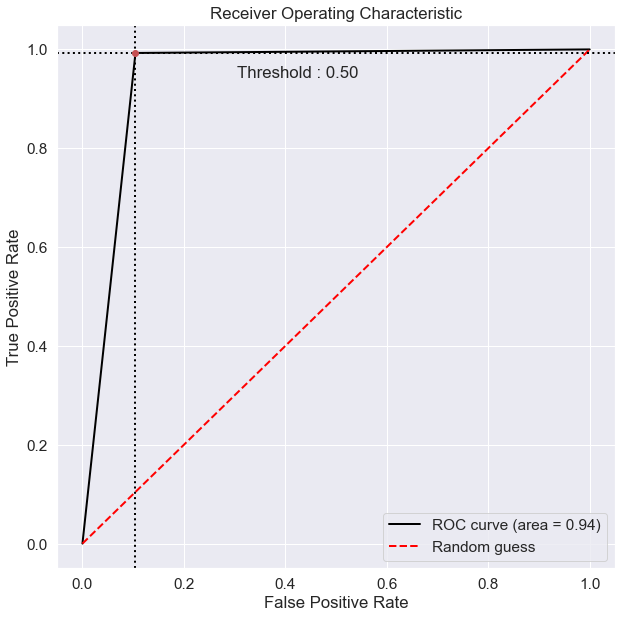

In [66]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred1, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

In [67]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators = 10, max_depth=30, max_delta_step=4, scale_pos_weight=49, random_state = 42, verbosity=0, n_jobs=-1, oob_score=True)
xgb.fit(X_train, y_train)

y_pred2 = xgb.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

C:\Users\mayra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9288001773695801

[[ 3346   547]
 [   21 11084]]


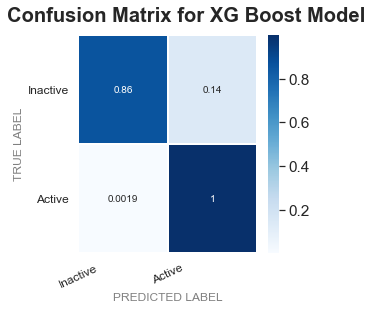

In [68]:
print(confusion_matrix(y_test, y_pred2))
matrix = confusion_matrix(y_test, y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Inactive', 'Active']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25, fontsize = 12)
plt.yticks(tick_marks2, class_names, rotation=0, fontsize = 12)
plt.xlabel('PREDICTED LABEL', fontsize=12, color='grey')
plt.ylabel('TRUE LABEL', fontsize=12, color='grey')
plt.suptitle('Confusion Matrix for XG Boost Model',fontweight='bold')
plt.show()

In [69]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3893
           1       0.95      1.00      0.98     11105

    accuracy                           0.96     14998
   macro avg       0.97      0.93      0.95     14998
weighted avg       0.96      0.96      0.96     14998



In [70]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.855
Accuracy score (validation): 0.853

Learning rate:  0.1
Accuracy score (training): 0.977
Accuracy score (validation): 0.979

Learning rate:  0.25
Accuracy score (training): 0.979
Accuracy score (validation): 0.980

Learning rate:  0.5
Accuracy score (training): 0.978
Accuracy score (validation): 0.980

Learning rate:  0.75
Accuracy score (training): 0.978
Accuracy score (validation): 0.980

Learning rate:  1
Accuracy score (training): 0.977
Accuracy score (validation): 0.979



In [71]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 42).fit(X_train, y_train)
y_pred3 = gb.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3893
           1       0.99      0.98      0.99     11105

    accuracy                           0.98     14998
   macro avg       0.97      0.97      0.97     14998
weighted avg       0.98      0.98      0.98     14998

[[ 3746   147]
 [  174 10931]]


In [72]:
roc3 = roc_auc_score(y_test, y_pred3)

roc3

0.9732856500307123

0.9732856500307123


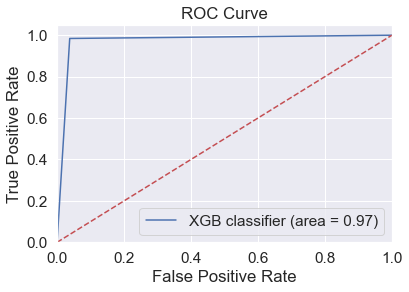

In [73]:
roc3 = roc_auc_score(y_test, y_pred3)
print(roc3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

plt.figure()
plt.plot(fpr, tpr, label='XGB classifier (area = %0.2f)' % roc3 )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[ 3746   147]
 [  174 10931]]


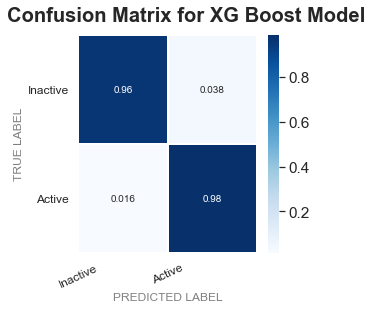

In [74]:
print(confusion_matrix(y_test, y_pred3))
matrix = confusion_matrix(y_test, y_pred3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Inactive', 'Active']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25, fontsize = 12)
plt.yticks(tick_marks2, class_names, rotation=0, fontsize = 12)
plt.xlabel('PREDICTED LABEL', fontsize=12, color='grey')
plt.ylabel('TRUE LABEL', fontsize=12, color='grey')
plt.suptitle('Confusion Matrix for XG Boost Model',fontweight='bold')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


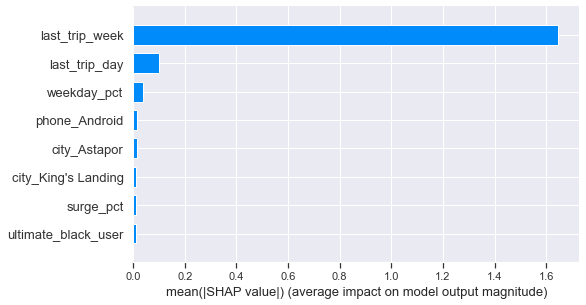

In [75]:
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

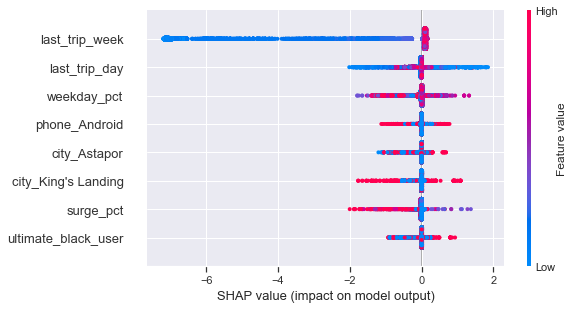

In [76]:
shap.summary_plot(shap_values, X_train)

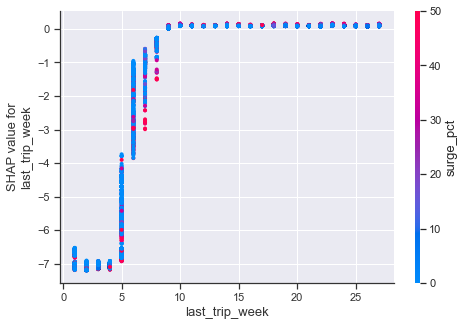

In [77]:
shap.dependence_plot("last_trip_week", shap_values, X_train)

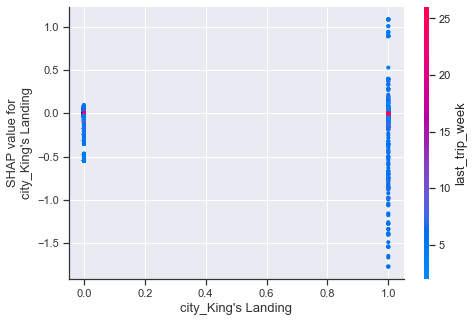

In [81]:
shap.dependence_plot("city_King's Landing", shap_values, X_train)

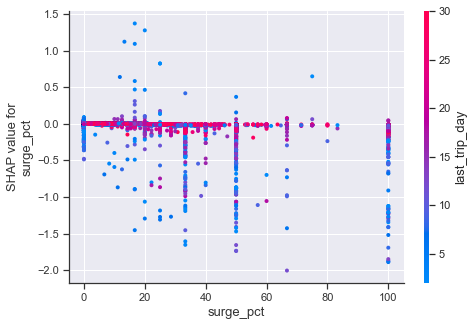

In [82]:
shap.dependence_plot("surge_pct", shap_values, X_train)

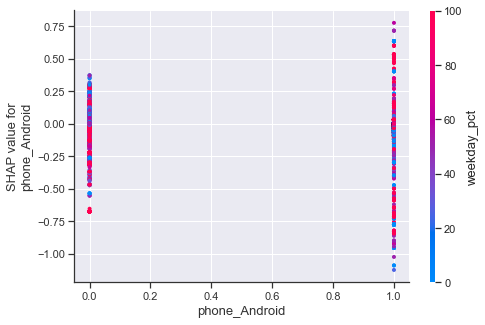

In [83]:
shap.dependence_plot("phone_Android", shap_values, X_train)